The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


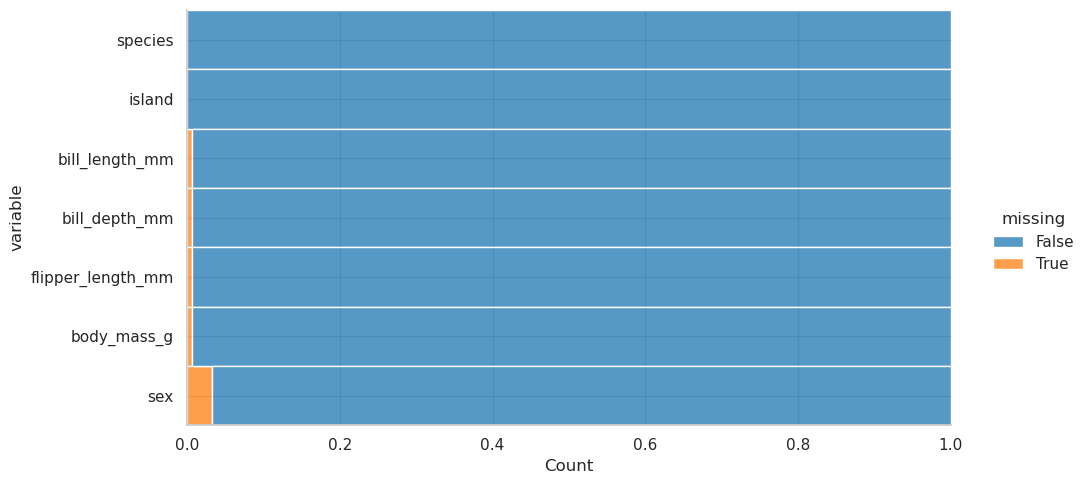

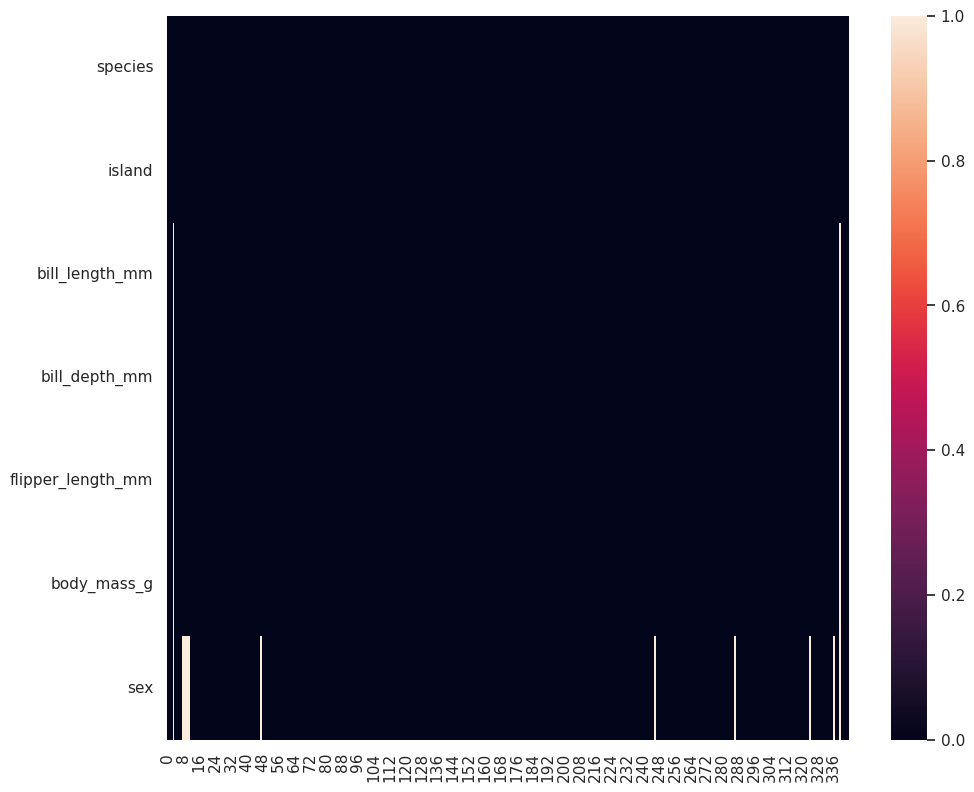

In [12]:
%run -i "0.2-antoniolml-data-collection-validation.ipynb"

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [16]:
processed_penguins_df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


### Solo las numéricas

In [18]:
processed_penguins_df.describe(include=[np.number]) # only numeric columns

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


### Solo categóricas - 1

In [20]:
processed_penguins_df.describe(include=object) # only object columns

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


**Solo categóricas - 2**


In [21]:
(
    processed_penguins_df
    .astype( # convert to category, and is better than use just describe
        {
            'species': 'category',
            'island': 'category',
            'sex': 'category'
        }
    )
    .describe(include=["category",object])
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


## ¿Cómo visualizar los conteos?

### pandas

In [32]:
def plot_values_counts(df, column, color_dict):
    (
        df[column]
        .value_counts()
        .plot(
            kind="bar",
            color=color_dict.values()
        )
    )

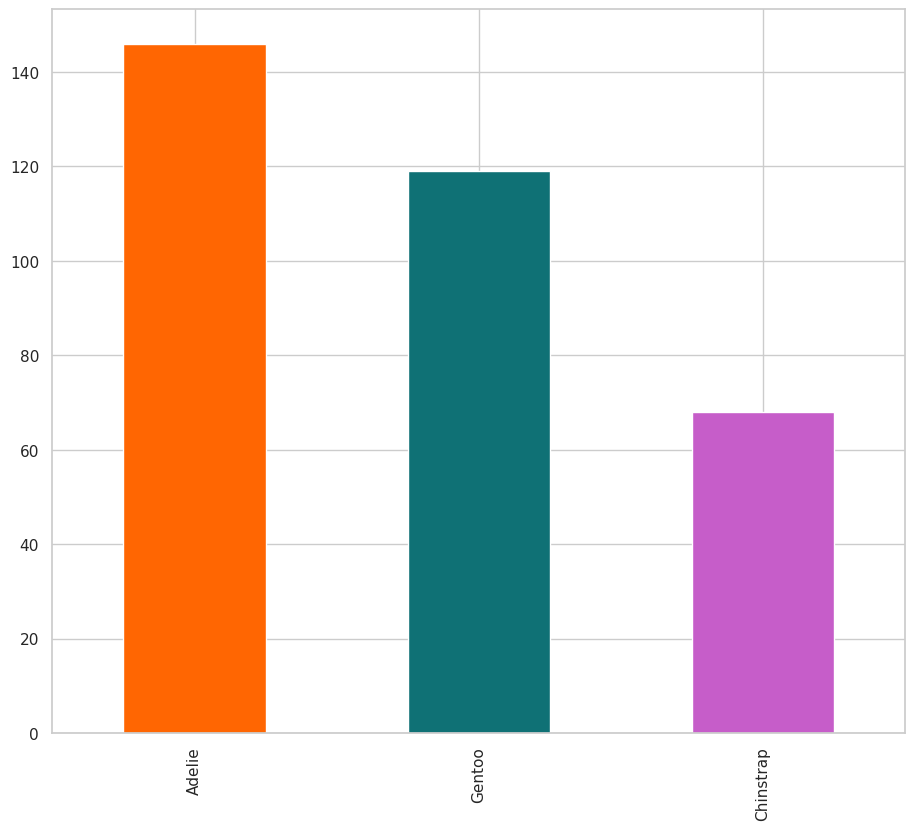

In [35]:
plot_values_counts(processed_penguins_df, "species", penguin_color)

## Seaborn

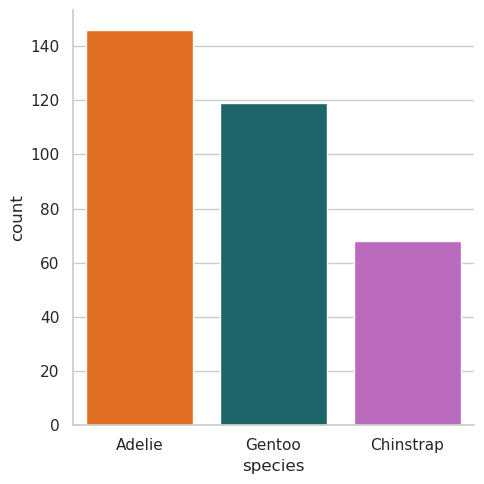

In [41]:
sns.catplot(
    data=processed_penguins_df,
    x="species",
    kind="count",
    palette=penguin_color,
    order=processed_penguins_df.value_counts("species",sort=True).index # sort by value counts

)

**¿Cómo visualizar las proporciones?**

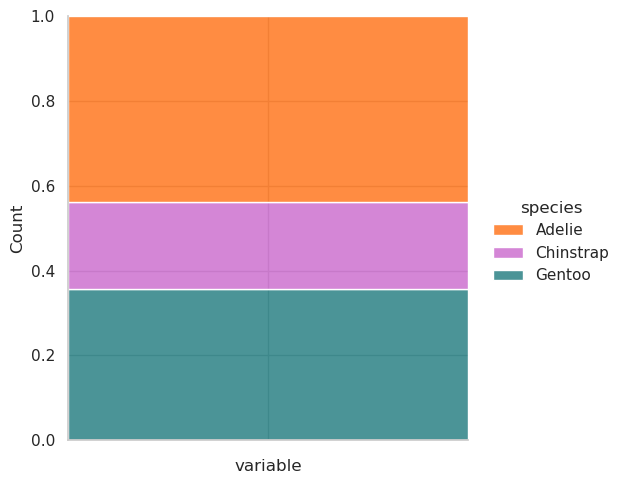

In [54]:
(
    processed_penguins_df
    .add_column("variable","")
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x="variable",
                hue="species",
                multiple="fill",
                palette=penguin_color

            )
        )
    )
)

In [55]:
processed_penguins_df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [58]:
processed_penguins_df.select_dtypes("category").columns

Index([], dtype='object')